In [1]:
import numpy as np
import pandas as pd
import statistics as st
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('pandas_data.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Data Preprocessing

In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [5]:
data.drop(index = 2012, axis = 1, inplace = True)

In [6]:
data1 = data.head()

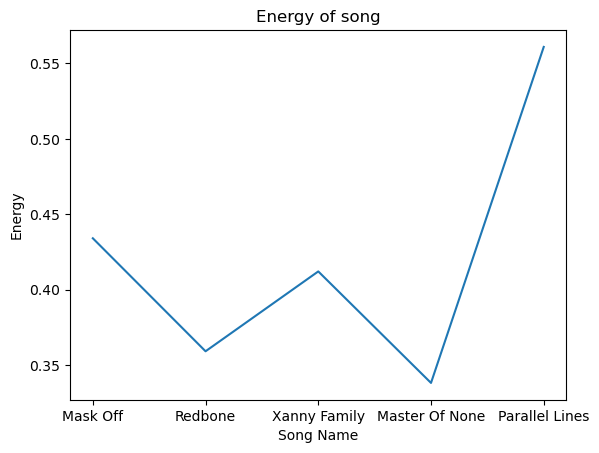

In [7]:
plt.plot(data1['song_title'],data1['energy'])
plt.title("Energy of song")
plt.xlabel('Song Name')
plt.ylabel('Energy')
plt.show()

# Ungrouped Frequency

In [8]:
data['key'].unique()

array([ 2,  1,  5,  8, 10, 11,  7,  0,  9,  6,  4,  3])

In [9]:
data['key'].value_counts()

1     256
0     216
7     212
9     191
11    187
2     184
5     166
6     159
10    141
8     136
4     105
3      63
Name: key, dtype: int64

<Axes: >

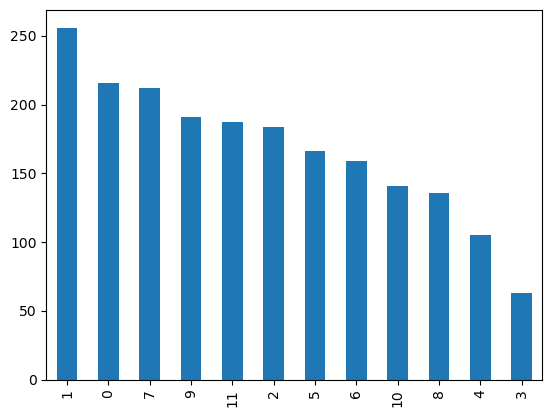

In [10]:
data['key'].value_counts().plot(kind='bar')

# Relative Frequency

In [11]:
key_in_mode = pd.crosstab(data['key'],'mode')

In [12]:
key_in_mode

col_0,mode
key,
0,216
1,256
2,184
3,63
4,105
5,166
6,159
7,212
8,136


In [13]:
key_in_mode['relative frequency'] = key_in_mode['mode']/key_in_mode["mode"].sum()

In [14]:
key_in_mode

col_0,mode,relative frequency
key,,
0,216,0.107143
1,256,0.126984
2,184,0.091270
3,63,0.031250
4,105,0.052083
5,166,0.082341
6,159,0.078869
7,212,0.105159
8,136,0.067460


In [15]:
key_in_mode["Percentage Frequency"] = key_in_mode["relative frequency"]*100

In [16]:
key_in_mode

col_0,mode,relative frequency,Percentage Frequency
key,,,
0,216,0.107143,10.714286
1,256,0.126984,12.698413
2,184,0.091270,9.126984
3,63,0.031250,3.125000
4,105,0.052083,5.208333
5,166,0.082341,8.234127
6,159,0.078869,7.886905
7,212,0.105159,10.515873
8,136,0.067460,6.746032


<Axes: ylabel='key'>

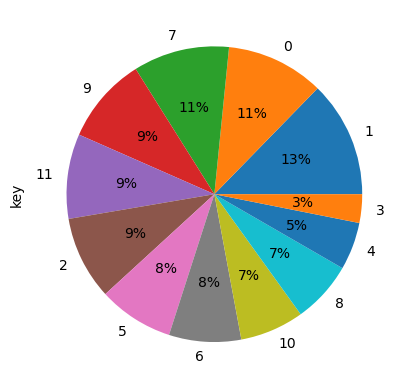

In [17]:
data["key"].value_counts().plot(kind="pie", autopct = "%1.f%%")

# Grouped Frequency

In [18]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [19]:
data["liveness"].value_counts(bins = 5)
# 5 equal intervalrange

(0.0168, 0.209]    1420
(0.209, 0.399]      420
(0.399, 0.589]       88
(0.589, 0.779]       73
(0.779, 0.969]       15
Name: liveness, dtype: int64

<Axes: >

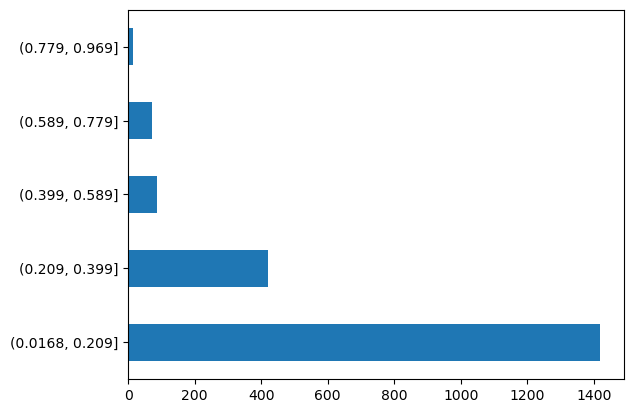

In [20]:
data["liveness"].value_counts(bins = 5).plot(kind = 'barh')

In [21]:
data["danceability"].value_counts(bins = 5)

(0.639, 0.812]    737
(0.467, 0.639]    699
(0.294, 0.467]    283
(0.812, 0.984]    223
(0.12, 0.294]      74
Name: danceability, dtype: int64

# Central Tendencies ---
## 1) Mean, Median, Mode

In [22]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [23]:
st.mean(data["duration_ms"])

246292.2599206349

In [24]:
st.mode(data["duration_ms"])
# Most repeaed value, if equals first occurence will be mode

192000

In [25]:
st.median(data["duration_ms"])
# Central value of dataset when it is sorted in acsending or descendig, incase even numbers take avg of two middles

229204.0

In [26]:
data.mean()

/tmp/ipykernel_13434/531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Unnamed: 0            1007.501984
acousticness             0.187683
danceability             0.618439
duration_ms         246292.259921
energy                   0.681453
instrumentalness         0.133350
key                      5.344742
liveness                 0.190875
loudness                -7.087402
mode                     0.612103
speechiness              0.092545
tempo                  121.626400
time_signature           3.968254
valence                  0.496957
target                   0.505952
dtype: float64

In [27]:
data.median()

/tmp/ipykernel_13434/4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


Unnamed: 0            1007.500000
acousticness             0.063500
danceability             0.631000
duration_ms         229204.000000
energy                   0.714500
instrumentalness         0.000076
key                      6.000000
liveness                 0.126500
loudness                -6.250000
mode                     1.000000
speechiness              0.054900
tempo                  121.468000
time_signature           4.000000
valence                  0.492500
target                   1.000000
dtype: float64

In [28]:
data.mode()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.119,0.683,192000.0,0.857,0.0,1.0,0.101,-5.379,1.0,0.0378,99.995,4.0,0.160,1.0,Jack,Drake
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1020,119.999,NaN,0.372,NaN,River,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.990,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.966,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.012,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Measures of Dispersion ----
## 1) Range, Variance, Standard Deviation
## 2) Interquartile range

In [29]:
data1 = [45,42,42,41,40]
data2 =[54,48,42,33,33]

In [30]:
mean_data1 = st.mean(data1)
mean_data2 = st.mean(data2)
print("Mean of data1 : ", mean_data1)

print("Mean of data2 : ", mean_data2)

Mean of data1 :  42
Mean of data2 :  42


In [31]:
mode_data1 = st.mode(data1)
mode_data2 = st.mode(data2)
print("Mode of data1 : ", mode_data1)

print("Mode of data2 : ", mode_data2)

Mode of data1 :  42
Mode of data2 :  33


In [32]:
median_data1 = st.median(data1)
median_data2 = st.median(data2)
print("Median of data1 : ", median_data1)

print("Median of data2 : ", median_data2)

Median of data1 :  42
Median of data2 :  42


### mean,median,mode similar of data1, data2

In [33]:
std_dev_data1 = st.pstdev(data1)
std_dev_data2 = st.pstdev(data2)
print("Standard deviation of data1 : ", std_dev_data1)

print("Standard deviation of data2 : ", std_dev_data2)

Standard deviation of data1 :  1.6733200530681511
Standard deviation of data2 :  8.270429251254134


In [34]:
variance_data1 = st.variance(data1)
variance_data2 = st.variance(data2)
print("Variance of data1 : ", variance_data1)

print("Variance of data2 : ", variance_data2)

Variance of data1 :  3.5
Variance of data2 :  85.5


### Now look at their difference in std dev and variance. Variance highlights more the spread out
### Let's see their interquartile Q3-Q1

In [35]:
# Q3 = data1.quantile(0.75) ---------- works with dataframe or series
# Q1 = data1.quantile(0.25) ---------- works with dataframe or series
# IQR = Q3 - Q1
# upper_bound = Q3 + (1.5*IQR)
# lower_bound = Q1 - (1.5*IQR)
# Filtered data = df(df['anyone'] > lower_bound & df['anyone'] < upper_bound)

# Measures of Shapes ---
## 1) Skewness
## 2) Kurtosis

In [36]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [37]:
data.drop(['song_title', 'artist'], axis = 1)
data.skew()

/tmp/ipykernel_13434/3762101957.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Unnamed: 0          0.000020
acousticness        1.657732
danceability       -0.419833
duration_ms         2.499102
energy             -0.912814
instrumentalness    1.951946
key                -0.010303
liveness            1.951889
loudness           -2.226521
mode               -0.460469
speechiness         2.315801
tempo               0.439999
time_signature     -2.233810
valence             0.077494
target             -0.023829
dtype: float64

In [38]:
P1 = (data.mean() - data.median())//data.std()
print(P1)
P2 = (data.mean() - data.mode())//data.std()
print(P2)
print()
print("P1 and P2 are positive means Positive Skewed : Tail at right end in normal distribution curve.")
print("P1 and P2 are negative means Negative Skewed : Tail at left end in normal distribution curve.")

/tmp/ipykernel_13434/3918145889.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  P1 = (data.mean() - data.median())//data.std()
/tmp/ipykernel_13434/3918145889.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  P1 = (data.mean() - data.median())//data.std()
/tmp/ipykernel_13434/3918145889.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value 

Unnamed: 0          0.0
acousticness        0.0
danceability       -1.0
duration_ms         0.0
energy             -1.0
instrumentalness    0.0
key                -1.0
liveness            0.0
loudness           -1.0
mode               -1.0
speechiness         0.0
tempo               0.0
time_signature     -1.0
valence             0.0
target             -1.0
dtype: float64
      Unnamed: 0  acousticness artist  danceability  duration_ms  energy  \
0            1.0           0.0    NaN          -1.0          0.0    -1.0   
1            1.0           NaN    NaN           NaN          NaN     NaN   
2            1.0           NaN    NaN           NaN          NaN     NaN   
3            1.0           NaN    NaN           NaN          NaN     NaN   
4            1.0           NaN    NaN           NaN          NaN     NaN   
...          ...           ...    ...           ...          ...     ...   
2011        -2.0           NaN    NaN           NaN          NaN     NaN   
2012        -2.0 

In [39]:
print(data.kurtosis())
print()
print("Kurtosis > 0 : Peaked Curve : Leptokurtic")
print("Kurtosis < 0 : Flat Curve : Platykurtic")
print("Kurtosis = 0 : Normal Curve : Mesokurtic")

Unnamed: 0          -1.199972
acousticness         1.743199
danceability        -0.208594
duration_ms         11.898481
energy               0.572721
instrumentalness     2.257886
key                 -1.338287
liveness             4.091689
loudness             7.908281
mode                -1.789744
speechiness          6.308377
tempo                0.043155
time_signature      19.697507
valence             -1.009999
target              -2.001419
dtype: float64

Kurtosis > 0 : Peaked Curve : Leptokurtic
Kurtosis < 0 : Flat Curve : Platykurtic
Kurtosis = 0 : Normal Curve : Mesokurtic


/tmp/ipykernel_13434/2992914167.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.kurtosis())
